In [1]:
%run "Common setup.ipynb"

In [2]:
from SALib.analyze.sobol_jansen import analyze

In [4]:
def incremental_radialsobol_analysis(lower, upper, step=1):
    res, idx = [], []
    for reps in range(lower, upper, step):
        results = analyze(CIM_SPEC, np_res[:reps], int(reps/step), seed=101)
        total = results.to_df()

        res.append(total.loc[tgt_param, 'ST'])
        idx.append(reps)
    # End for
    
    return res, idx
# End incremental_radialsobol_analysis()

In [5]:
### With more samples...

numeric_samples = pd.read_csv(f'{DATA_DIR}radial_10_numeric_samples.csv', index_col=0)
numeric_samples = numeric_samples[perturbed_cols]
numeric_vals = numeric_samples.values

In [6]:
# Coupling disabled
radial_no_irrigation_results = pd.read_csv(f'{DATA_DIR}radial_no_irrigation_10_results.csv', index_col=0)
target_result_idx = radial_no_irrigation_results.columns.tolist().index(tgt_metric)

np_res = radial_no_irrigation_results.values[:, target_result_idx]
runs = np_res.shape[0]

res, idx = incremental_radialsobol_analysis(54, runs+1, 54)

c:\programs\owncloud\projects\salib\src\SALib\analyze\sobol_jansen.py:100: RuntimeWarning: divide by zero encountered in true_divide
  Si['ST'] = (jansen_estimator(sample_sets, st) / base_variance)
c:\programs\owncloud\projects\salib\src\SALib\analyze\sobol_jansen.py:150: RuntimeWarning: divide by zero encountered in true_divide
  resampled = jansen_estimator(N, si[idx]) / base_variance
C:\programs\miniconda3\envs\salib\lib\site-packages\numpy\core\_methods.py:193: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


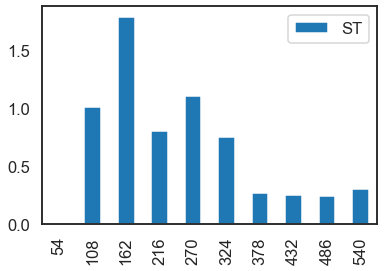

In [7]:
pd.DataFrame({'ST': res}, index=idx).plot(kind='bar')

In [8]:
# Coupling enabled

radial_with_irrigation_results = pd.read_csv(f'{DATA_DIR}radial_with_irrigation_10_results.csv', index_col=0)
target_result_idx = radial_with_irrigation_results.columns.tolist().index(tgt_metric)

np_res = radial_with_irrigation_results.values[:, target_result_idx]

res, idx = incremental_radialsobol_analysis(54, runs+1, 54)

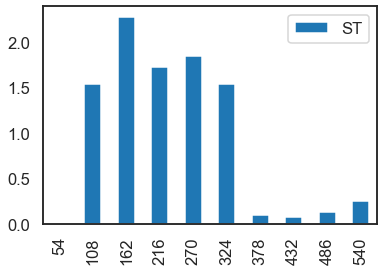

In [9]:
# plot_incremental_results(res, idx)
pd.DataFrame({'ST': res}, index=idx).plot(kind='bar')  # , figsize=(16,4)

---

In [10]:
target_result_idx = all_outputs.columns.tolist().index(tgt_metric)

numeric_samples = to_numeric_samples(all_inputs)
numeric_vals = numeric_samples.values
np_res = all_outputs.iloc[:, target_result_idx].values

res, idx = incremental_radialsobol_analysis(54, 5625, 54)

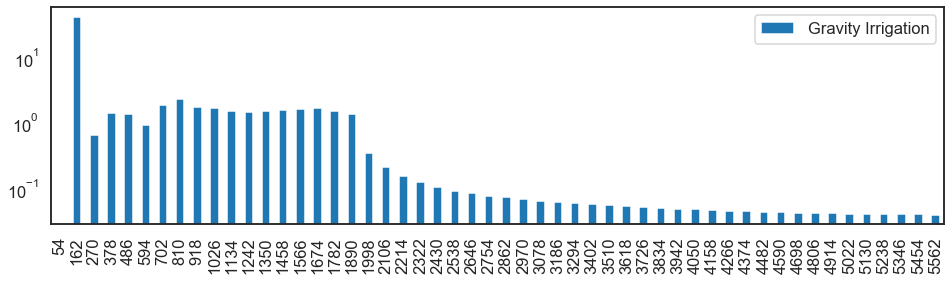

In [11]:
pd.DataFrame({'Gravity Irrigation': res[::2]}, index=idx[::2]).plot(kind='bar', figsize=(16,4), logy=True)

Subset of results - focusing on runs that actually perturbed Gravity Irrigation efficiency

In [12]:
param_idx = numeric_samples.columns.tolist().index(tgt_param)
vals, idx = np.unique(numeric_vals[:, param_idx], return_index=True)

np_res = numeric_vals[idx, param_idx]
rows = np_res.shape[0]

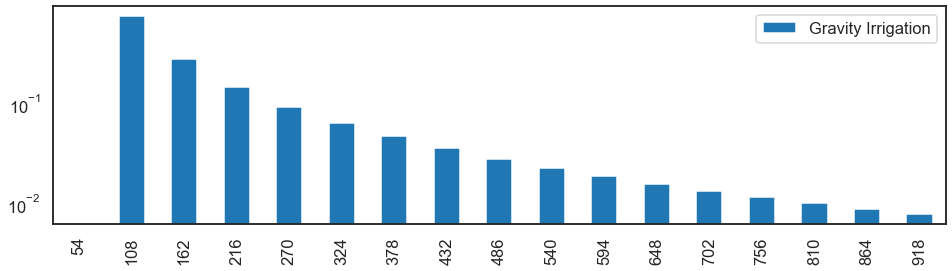

In [13]:
res, idx = incremental_radialsobol_analysis(54, len(np_res), 54)
pd.DataFrame({'Gravity Irrigation': res}, index=idx).plot(kind='bar', figsize=(16,4), logy=True)